<a href="https://colab.research.google.com/github/smaiti7/3d-transforms/blob/main/DeepLearningCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For visualizations

!pip install torchviz onnx

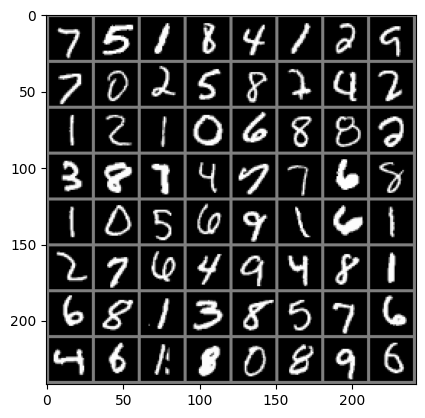

In [ ]:
# Define the transformations for the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load a batch of test data to display an image
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show a random image from the batch
imshow(torchvision.utils.make_grid(images))

In [ ]:
# MNIST!
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input size is 28x28 (MNIST images)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 output classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
net = MLP()
net.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training loop
for epoch in range(20):  # You can change the number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs.to("cuda"))
        loss = criterion(outputs, labels.to("cuda"))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')

print('Finished Training')


Epoch 1, Loss: 1.0114944535754382
Epoch 2, Loss: 0.38336611302422563
Epoch 3, Loss: 0.32265311278609327
Epoch 4, Loss: 0.29215923286895
Epoch 5, Loss: 0.268300105140471
Epoch 6, Loss: 0.24693441652714698


In [ ]:
# Simple NN!
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # 1d in
        self.fc2 = nn.Linear(2, 2)
        self.fc3 = nn.Linear(2, 1)  # 1d out

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
from torchviz import make_dot

y = net(torch.randn(28, 28).to("cuda"))
make_dot(y.mean(), params=dict(net.named_parameters()))

simplenet = SimpleMLP()

torch.onnx.export(net, torch.randn(28, 28).to("cuda"), "net.onnx", input_names=["Image"], output_names=["Class"])
torch.onnx.export(simplenet, torch.randn(1, 1), "simplenet.onnx", input_names=["x"], output_names=["y"])

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load a batch of test data to display an image
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show a random image from the batch
imshow(torchvision.utils.make_grid(images))

# Get the model's predictions for this batch
outputs = net(images.to("cuda"))

# Get the predicted class for each image in the batch
_, predicted = torch.max(outputs, 1)

# Print the predicted classes
print('Predicted: ', ' '.join(f'{predicted[j]}' for j in range(4)))
